In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
import numpy as np
import math
import matplotlib.patches as mpatches
from statsmodels.stats.multitest import multipletests
from seaborn import pointplot

In [15]:
inFile = '/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/gwas_enrichments/monocyte_microglia/kunkle_enrichments.cell_type_results.txt'
data = pd.read_csv(inFile, sep="\t", header=0)

In [16]:
data.head()

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,monocyte_dnase,2.954993e-07,1.438036e-07,0.019945
1,gosselin_microglia,-1.202519e-07,1.598233e-07,0.774096


/home/eramamur/bin/miniconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


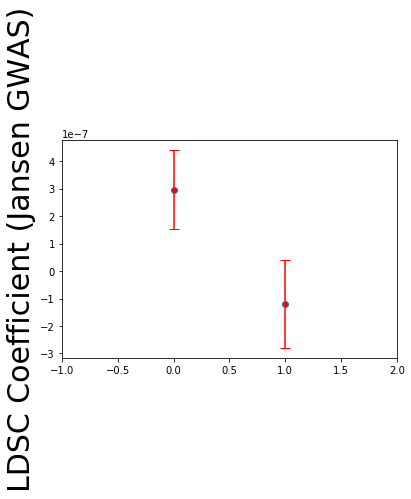

In [12]:
dims = (20, 16)
plt.errorbar([0,1], y=data["Coefficient"],
                yerr=data["Coefficient_std_error"],
                fmt='o',
                capsize=5,
                ecolor='red',
                markerfacecolor='red')

plt.ylabel("LDSC Coefficient (Jansen GWAS)", fontsize=30)
plt.xlim(-1,2)
plt.tight_layout()
plt.show()
plt.close()